<a href="https://colab.research.google.com/github/ZacharySBrown/vcu-scma440-2021q1/blob/master/examples/2a_forecasting_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fetch Data

In [46]:
!curl https://raw.githubusercontent.com/ZacharySBrown/vcu-scma440-2021q1/master/utils/fetch_e1.sh > fetch_e1.sh
!bash fetch_e1.sh    

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   389  100   389    0     0   1760      0 --:--:-- --:--:-- --:--:--  1768
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  449k  100  449k    0     0   495k      0 --:--:-- --:--:-- --:--:--  494k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2862  100  2862    0     0  13311      0 --:--:-- --:--:-- --:--:-- 13311
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   780  100   780    0     0   3861      0 --:--:-- --:--:-- --:--:--  3861


In [47]:
!ls

ames_housing.csv  fetch_e1.sh  melboure_housing.csv
beer.dat	  jampg.dat    sample_data


# Import Relevant Packages and load data

In [48]:
# Import the `pandas` python package (and alias as pd)
import pandas as pd

# Import the pyplot subpackage from matplotlib for making plots
from matplotlib import pyplot as plt
%matplotlib inline

# Use the `pd.read_csv()` method to load some data
beer = pd.read_csv('beer.dat', names=['megaliters'])

# Data Info: http://jse.amstat.org/v19n3/decock.pdf
housing = pd.read_csv('ames_housing.csv')

# Time Series and Cross Sectional Data

## Time Series Data

   megaliters
0        93.2
1        96.0
2        95.2
3        77.1
4        70.9


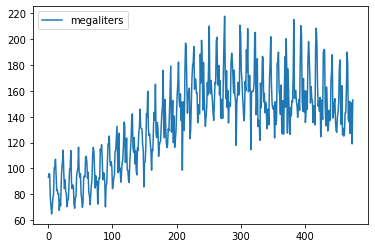

In [49]:
print(beer.head())
beer.plot()

## Cross-sectional Data

In [56]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Graphical Summaries

## Line Plots for Time Series

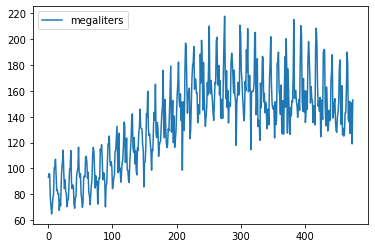

In [32]:
beer.plot()

## Histograms

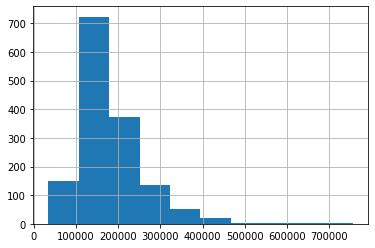

In [51]:
housing.SalePrice.hist()

## Scatter Plots

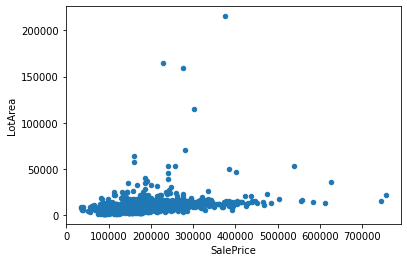

In [53]:
housing[['SalePrice','LotArea']].dropna().plot(kind='scatter', x='SalePrice',y='LotArea')

## Bar Charts

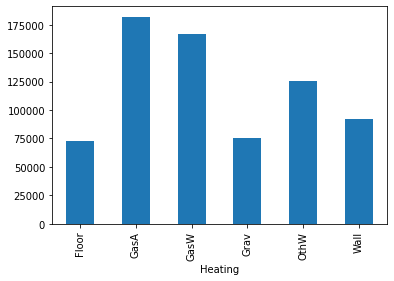

In [54]:
housing.groupby('Heating')['SalePrice'].mean().plot(kind='bar')

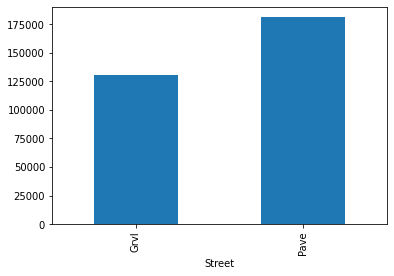

In [57]:
housing.groupby('Street')['SalePrice'].mean().plot(kind='bar')

# Numeric Summeries

## Univariate

In [59]:
print(housing.SalePrice.describe())

print("variance:")
print(housing.SalePrice.var())

print("MAD")
print(housing.SalePrice.mad())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
variance:
6311111264.297451
MAD
57434.770275849274


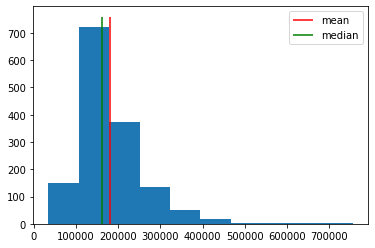

In [60]:
mean = housing.SalePrice.mean()
median = housing.SalePrice.median()

plt.hist(housing.SalePrice)
y_bottom, y_top = plt.ylim()

plt.vlines(mean, y_bottom, y_top, color='red', label='mean')
plt.vlines(median, y_bottom, y_top, color='green', label='median')

plt.legend()

## Bivariate

In [61]:
housing[['SalePrice','LotArea']].dropna().corr()

,SalePrice,LotArea
SalePrice,1.000000,0.263843
LotArea,0.263843,1.000000


## Autoregressive

In [63]:
beer.megaliters.autocorr(lag=1)

0.83035507639678

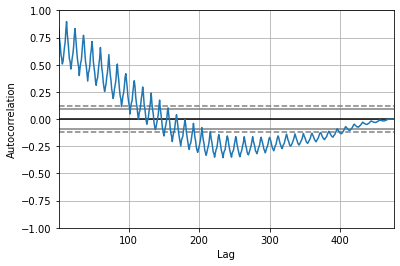

In [66]:
pd.plotting.autocorrelation_plot(beer.megaliters)